# Results finales

## Ex. Image 1

### Initial plot of gts and rp proposals

Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_test.json


/tmp/ipykernel_15459/3532356490.py:67: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


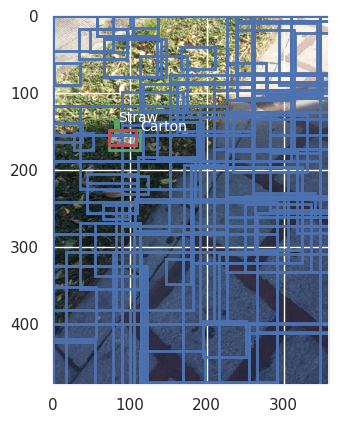

In [24]:
import matplotlib.pyplot as plt

dataset_creation = "test"

classes = {'Background':28 , 'Aluminium foil': 0, 'Battery': 1, 'Blister pack': 2, 'Bottle': 3, 'Bottle cap': 4, 
    'Broken glass': 5, 'Can': 6, 'Carton': 7, 'Cup': 8, 'Food waste': 9, 'Glass jar': 10, 
    'Lid': 11, 'Other plastic': 12, 'Paper': 13, 'Paper bag': 14, 'Plastic bag & wrapper': 15,
    'Plastic container': 16, 'Plastic glooves': 17, 'Plastic utensils': 18, 'Pop tab': 19,
    'Rope & strings': 20, 'Scrap metal': 21, 'Shoe': 22, 'Squeezable tube': 23, 'Straw': 24,
    'Styrofoam piece': 25, 'Unlabeled litter': 26, 'Cigarette': 27}

# ------------------- Import the dataset ------------------- #
if dataset_creation == "train":
    # Instantiate the dataset and dataloader
    dataset = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'train', transform=None)
elif dataset_creation == "val":
    dataset = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'val', transform=None)
elif dataset_creation == "test":
    dataset = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'test', transform=None)
else:
    raise ValueError("dataset_creation should be either train, val or test")

# --------------------- Declare Image ---------------------- #
image, anns = dataset[1]
resized_image, ratio = resize_image(image)
image = np.array(resized_image)

# ---- Dictionary storing for testing data ---- #
with open(r"/work3/s212725/WasteProject/results/corrected_testing_rp_dict.pkl", "rb") as f:
    # Load the contents of the pickle file into a variable
    testing_dict = pickle.load(f)

# Show the cropped image
fig, ax = plt.subplots()
    
gt_boxes = testing_dict["gt_bboxs"][1]
super_cats = testing_dict["super_cats"][1]
rp_boxes = testing_dict["rp_boxes"][1]

# Loop through the bounding boxes and add a rectangle to the axis for each one
for i, rp_crop in enumerate(rp_boxes):
    rect = patches.Rectangle((rp_crop[0], rp_crop[1]), rp_crop[2]-rp_crop[0], rp_crop[3]-rp_crop[1], linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    
# Loop through the bounding boxes and add a rectangle to the axis for each one
for i, box in enumerate(gt_boxes):
    x, y, w, h = box
    rect = patches.Rectangle((x*ratio, y*ratio), w*ratio, h*ratio, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    # Add text to the right of the bounding box
    ax.text((x+w)*ratio, y*ratio, f'{super_cats[i]}', fontsize=10, color='w')

crop = testing_dict["rp_boxes"][1][41]
rect = patches.Rectangle((crop[0], crop[1]), crop[2]-crop[0], crop[3]-crop[1], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.imshow(image)
plt.show()

### Second plot with the positively predicted crops

Loading the predicted labels after testing

In [25]:
import json
import re

# Load the pickle dic
with open(r"/work3/s212725/WasteProject/results/test_loop_crops_paths_to_predicted_label.json", "rb") as f:
    # Load the contents of the pickle file into a variable
    crops_paths_to_predicted_label = json.load(f)

Get only positive labels given file name

In [26]:
positive_predicted_crops = []
positive_predicted_crops_labels = []
for i, (crop, label) in enumerate(crops_paths_to_predicted_label.items()):
    pattern = r'^/work3/s212725/WasteProject/data/test_proposals/crops/batch_7/000038_[^/]*\.jpg$'
    match = re.match(pattern, crop)
    if match:
        if label != 28:
            positive_predicted_crops.append(crop)
            positive_predicted_crops_labels.append(label)

In [27]:
print(positive_predicted_crops)
print(positive_predicted_crops_labels)

['/work3/s212725/WasteProject/data/test_proposals/crops/batch_7/000038_gt0.jpg', '/work3/s212725/WasteProject/data/test_proposals/crops/batch_7/000038_gt1.jpg', '/work3/s212725/WasteProject/data/test_proposals/crops/batch_7/000038_41.jpg']
[15, 27, 15]


## Get GT label from image_path

In [28]:
import json

def get_gt_label_from_image_path(image_path):
    # Define the path to the JSON file
    path_test = r"/work3/s212725/WasteProject/data/json/corrected_test_region_proposals_3.json"

    # Open the JSON file and load its contents into a Python dictionary
    with open(path_test, "r") as f:
        json_data = json.load(f)

    for i, (crop, label) in enumerate(json_data.items()):
        pattern = f'{image_path}'
        match = re.match(pattern, crop)
        if match:
            gt_label = label
    return gt_label

## Let's plot these positive crops

In [29]:
def from_name_to_supercat_id(value_to_find):
    supercategory_id_to_name = {'Background':28, 'Aluminium foil': 0, 'Battery': 1, 'Blister pack': 2, 'Bottle': 3, 'Bottle cap': 4, 
    'Broken glass': 5, 'Can': 6, 'Carton': 7, 'Cup': 8, 'Food waste': 9, 'Glass jar': 10, 
    'Lid': 11, 'Other plastic': 12, 'Paper': 13, 'Paper bag': 14, 'Plastic bag & wrapper': 15,
    'Plastic container': 16, 'Plastic glooves': 17, 'Plastic utensils': 18, 'Pop tab': 19,
    'Rope & strings': 20, 'Scrap metal': 21, 'Shoe': 22, 'Squeezable tube': 23, 'Straw': 24,
    'Styrofoam piece': 25, 'Unlabeled litter': 26, 'Cigarette': 27}
        
    for key, value in supercategory_id_to_name.items():
        print(value)
        print(value_to_find)
        if value == value_to_find:
            return key

/tmp/ipykernel_15459/178530464.py:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


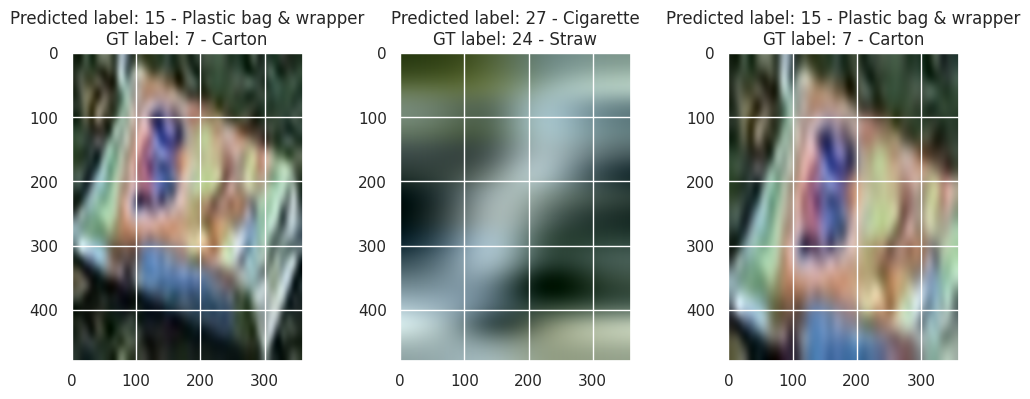

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import PIL.Image as pil_image
import pickle
from PIL import Image, ExifTags
from src.data.utils import from_name_to_supercat_id

    
# Define the paths to the three images
image_paths = [
    positive_predicted_crops[0],
    positive_predicted_crops[1],
    positive_predicted_crops[2]
]

# Create a figure with three axes
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, path in enumerate(image_paths):
    # Load the image
    image = pil_image.open(path)
    width, height = image.size

    # Determine which dimension to resize based on maximum dimension
    if width >= height and width > 480:
        ratio = 480.0 / width
        new_size = (int(width * ratio), int(height * ratio))
    elif height >= width and height > 480:
        ratio = 480.0 / height
        new_size = (int(width * ratio), int(height * ratio))

    resized_image = image.resize(new_size, Image.ANTIALIAS)
    image = np.array(resized_image)

    gt_label = get_gt_label_from_image_path(positive_predicted_crops[i])
    # Show the image on the corresponding axis
    axs[i].imshow(resized_image)
    axs[i].set_title(f'Predicted label: {positive_predicted_crops_labels[i]} - {from_name_to_supercat_id(positive_predicted_crops_labels[i])}\nGT label: {gt_label} - {from_name_to_supercat_id(gt_label)}', fontsize=12)

plt.savefig('positive_samples_1.png')
# Show the plot
plt.show()

## Let's get the bounding boxes of these crops

In [37]:
idx = testing_dict["crop_paths"][1].index(positive_predicted_crops[2])
print("2 positions need to be substrated from the index given the 2 extra gt crops")
print(f"Index is: {idx-2}")
bbxs = []

bounding_box_pos_image = testing_dict["rp_boxes"][1][idx-2]
print(bounding_box_pos_image)

2 positions need to be substrated from the index given the 2 extra gt crops
Index is: 41
(73, 148, 108, 168)


Now we can plot just the predicted crops with their labels

Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_test.json


/tmp/ipykernel_15459/3532356490.py:67: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


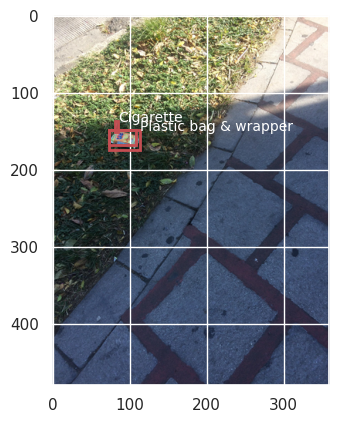

In [42]:
import matplotlib.pyplot as plt

dataset_creation = "test"

classes = {'Background':28 , 'Aluminium foil': 0, 'Battery': 1, 'Blister pack': 2, 'Bottle': 3, 'Bottle cap': 4, 
    'Broken glass': 5, 'Can': 6, 'Carton': 7, 'Cup': 8, 'Food waste': 9, 'Glass jar': 10, 
    'Lid': 11, 'Other plastic': 12, 'Paper': 13, 'Paper bag': 14, 'Plastic bag & wrapper': 15,
    'Plastic container': 16, 'Plastic glooves': 17, 'Plastic utensils': 18, 'Pop tab': 19,
    'Rope & strings': 20, 'Scrap metal': 21, 'Shoe': 22, 'Squeezable tube': 23, 'Straw': 24,
    'Styrofoam piece': 25, 'Unlabeled litter': 26, 'Cigarette': 27}

# ------------------- Import the dataset ------------------- #
if dataset_creation == "train":
    # Instantiate the dataset and dataloader
    dataset = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'train', transform=None)
elif dataset_creation == "val":
    dataset = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'val', transform=None)
elif dataset_creation == "test":
    dataset = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'test', transform=None)
else:
    raise ValueError("dataset_creation should be either train, val or test")

# --------------------- Declare Image ---------------------- #
image, anns = dataset[1]
resized_image, ratio = resize_image(image)
image = np.array(resized_image)

# ---- Dictionary storing for testing data ---- #
with open(r"/work3/s212725/WasteProject/results/corrected_testing_rp_dict.pkl", "rb") as f:
    # Load the contents of the pickle file into a variable
    testing_dict = pickle.load(f)

# Show the cropped image
fig, ax = plt.subplots()
    
gt_boxes = testing_dict["gt_bboxs"][1]
super_cats = testing_dict["super_cats"][1]
rp_boxes = testing_dict["rp_boxes"][1]


# Loop through the bounding boxes and add a rectangle to the axis for each one
for i, box in enumerate(gt_boxes):
    x, y, w, h = box
    rect = patches.Rectangle((x*ratio, y*ratio), w*ratio, h*ratio, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    # Add text to the right of the bounding box
    ax.text((x+w)*ratio, y*ratio, f'{from_name_to_supercat_id(positive_predicted_crops_labels[i])}', fontsize=10, color='w')

crop = testing_dict["rp_boxes"][1][41]
rect = patches.Rectangle((crop[0], crop[1]), crop[2]-crop[0], crop[3]-crop[1], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)


ax.imshow(image)
plt.show()